In [122]:
%load_ext autoreload
%autoreload 2
import numpy as np
import astropy.coordinates
from astropy import units as u
import path
import matplotlib.pyplot as plt
import matplotlib as mpl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


11.066342031734408 67.05318381416612 -10.860261633798082 -6.209394356388839 8.64949922577398


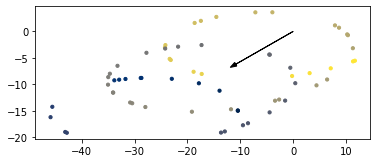

In [129]:
ra=360*np.random.rand()
dec=90*(-1+2*np.random.rand())
pmra=10*np.random.randn()
pmdec=10*np.random.randn()
pllx=10*np.random.rand()
params=path.params()
params.RA=ra
params.Dec=dec
params.pmRA=pmra
params.pmDec=pmdec
params.pllx=pllx
ts=np.sort((34/12)*np.random.rand(64))
print(ra,dec,pmra,pmdec,pllx)
ras,decs=path.path(ts,params)


dRas=(ras-ra)/path.mas2deg
dDecs=(decs-dec)/path.mas2deg

qPl=plt.gca()
timeCmap=mpl.cm.get_cmap('cividis_r')
qPl.scatter(dRas,dDecs,s=10,c=timeCmap(ts/ts[-1]))
qPl.arrow(0,0,pmra,pmdec,head_width=0.8,color='k')
qPl.set_aspect('equal')
plt.show()

In [118]:
coord=astropy.coordinates.SkyCoord(ra=10.625*u.degree, dec=0*u.degree, pm_ra_cosdec=2*u.mas/u.yr, pm_dec=2*u.mas/u.yr, frame='icrs')

In [35]:
print(coord.barycentrictrueecliptic)
print(coord.barycentrictrueecliptic.lon.degree)
lat=coord.barycentrictrueecliptic.lat.degree
print(coord.barycentrictrueecliptic.pm_lon_coslat.value/np.cos(np.pi*lat/180))
print(coord.barycentrictrueecliptic.pm_lat.value)
print(np.sqrt((coord.barycentrictrueecliptic.pm_lon_coslat.value/np.cos(np.pi*lat/180))**2+coord.barycentrictrueecliptic.pm_lat.value++2))
print(np.sqrt(8))

<SkyCoord (BarycentricTrueEcliptic: equinox=J2000.000): (lon, lat) in deg
    (9.76187984, -4.20625309)
 (pm_lon_coslat, pm_lat) in mas / yr
    (2.62397437, 1.05582126)>
9.761879842812618
2.631061186369181
1.0558212570902263
3.1588453940496404
2.8284271247461903


In [37]:
coord=astropy.coordinates.SkyCoord(lon=10.625*u.degree, lat=0*u.degree, frame='barycentrictrueecliptic')

In [39]:
print(coord.icrs)

<SkyCoord (ICRS): (ra, dec) in deg
    (9.76931376, 4.20776907)>
